# Predicting Apple Inc. Stock Prices Using LSTM Model

Using historical data from 1980 to 2021, I will construct and train an LSTM model for this assignment in order to forecast Apple Inc. stock values for 2021. Because it can identify long-term dependencies in sequential data, the LSTM model, a kind of recurrent neural network (RNN), is a good fit for time series forecasting. Preparing the data, building the model, training, and evaluating the project are some of the tasks involved. In order to evaluate how accurate my predictions were, I will also display the outcomes. In order to assess the model's efficacy and identify areas for improvement, I will lastly expand its use to forecast stock prices for the year 2022.

## Problem Statement

My goal is to forecast Apple Inc.'s stock price for 2021 based on past data spanning from 1980 to 2021. By using a Long Short-Term Memory (LSTM) model—a kind of recurrent neural network (RNN) renowned for its capacity to identify long-term dependencies in sequential data—this prediction will be realized. I will use metrics like Root Mean Squared Error (RMSE) to gauge how accurate my model is in predicting stock prices, and I will also examine its performance.


## Algorithm of the Solution

1. **Data Preparation**:
   - **Loading the Dataset**: Among the columns in the AAPL dataset are Date, Open, High, Low, Close, Adj Close, and Volume. I will load this dataset.
   - **Preprocessing**: All data will be in a format that is appropriate for LSTM input, and I will take care of any missing values. This entails transforming time series data into historical observation sequences.

2. **Model Building**:
   - **LSTM Model Construction**: I will use a deep learning framework like TensorFlow or PyTorch to create an LSTM model architecture. To identify intricate relationships and patterns in the sequential stock price data, I want to stack LSTM layers.
   - **Hyperparameter Tuning**: To maximize the performance of my model, I will experiment with various LSTM layer topologies, the number of units per layer, activation functions, dropout rates, and batch sizes.

3. **Model Training**:
   - **Training Data Split**: I'll divide the dataset into training and testing sets, with training based on historical data spanning from 1980 to 2020.
   - **Epochs and Validation**: I'll train the LSTM model across a number of epochs (such as the prescribed 75 epochs), validating on a subset of the training set to keep an eye out for overfitting.

4. **Model Evaluation**:
   - **Predicting 2021 Prices**: Using the testing set, I will forecast Apple's stock values for 2021 in order to assess the efficacy of my trained LSTM model.
   - **RMSE Calculation**: To measure the accuracy of my model's predictions, I will compute the Root Mean Squared Error (RMSE) between the actual and forecast stock prices.

5. **Predicting 2022 Prices**:
   - Using the knowledge I've gathered from the 2021 projections, I'll expand my trained LSTM model to forecast Apple's stock values for 2022.


## Dataset Description

The dataset used in this project is named AAPL, which contains historical stock prices of Apple Inc. from the year 1980 to 2021. It consists of the following columns:

- **Date**: The date of the trading day.
- **Open**: The opening price of the stock on that day.
- **High**: The highest price reached during the trading day.
- **Low**: The lowest price reached during the trading day.
- **Close**: The closing price of the stock on that day.
- **Adj Close**: The adjusted closing price, which accounts for corporate actions such as dividends and stock splits.
- **Volume**: The number of shares traded on that day.

### Dataset Loading and Inspection

To gain an understanding of the dataset's properties and structure, let's load and examine it first. For data management and visualization, we'll use Python tools like pandas and matplotlib/seaborn.



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AAPL dataset
df = pd.read_csv('AAPL.csv')  


#### Display the first few rows of the dataset

#### Summary statistics of the dataset

In [3]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
               Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09  


#### Check for missing values

In [4]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Loading and Preparing the Dataset
I need to load the dataset (AAPL.csv) and prepare it for use with the LSTM model.

In [20]:
import pandas as pd

df = pd.read_csv('AAPL.csv')

# Display the first few rows to understand the structure
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


### Data Preprocessing and Scaling
I preprocess and scale the data using MinMaxScaler from sklearn.preprocessing.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Close' prices and scale the data
data = df.filter(['Close']).values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


I use the **MinMaxScaler}** from **sklearn.preprocessing** to preprocess and scale the data. 'Close' prices are extracted first, and they are then converted into a numpy array. Next, I apply the **MinMaxScaler** to the 'Close' price data after initializing it with a feature range of (0, 1). This guarantees that every 'Close' price is adjusted to lie inside the interval [0, 1], which is essential for LSTM model training. During the training process, normalized data promotes greater performance and quicker convergence.


### Prepare Training Data for LSTM
Prepare the training data by creating sequences of past data points **(x_train)** and their corresponding next data point **(y_train)**.

In [22]:
import numpy as np

# Define the training data length (80% of the total data)
training_data_len = int(len(data) * 0.8)

# Split the data into train and test sets
train_data = scaled_data[:training_data_len, :]

# Prepare x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM input shape (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

I make sequences of previous data points **(x_train)** and their matching next data point **(y_train)** in order to prepare the training data for the LSTM model. First, I determine that 80% of the total data is the training data length. After that, I divided the data into testing and training sets. I anticipate the following day for **x_train** and **y_train** using a window of 60 past days. Once these sequences are created, I turn them into numpy arrays and then restructure **x_train** to match the **(samples, time steps, features)** LSTM input form.


### Build and Train the LSTM Model
Construct the LSTM model using TensorFlow/Keras and train it on the prepared training data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

I utilize TensorFlow/Keras for LSTM model construction and training. To avoid overfitting, I include dropout layers and stack LSTM layers when building the model. The architecture of the model consists of two 50-unit LSTM layers, followed by dropout layers at a 0.2 rate. The last layer, which outputs the anticipated stock price, is a dense layer with one unit. After that, I use the mean squared error loss function and the Adam optimizer to construct the model.


### Train Model

In [24]:
# Train the model
history = model.fit(x_train, y_train, epochs=75, batch_size=32, validation_split=0.1)

Epoch 1/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - loss: 2.6435e-05 - val_loss: 1.7021e-05
Epoch 2/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 2.6343e-06 - val_loss: 1.8063e-05
Epoch 3/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 2.2241e-06 - val_loss: 1.1634e-05
Epoch 4/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 2.2737e-06 - val_loss: 2.2537e-05
Epoch 5/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.8971e-06 - val_loss: 3.3216e-05
Epoch 6/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.6307e-06 - val_loss: 2.8840e-05
Epoch 7/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 2.1870e-06 - val_loss: 1.2196e-05
Epoch 8/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.6623e-06 - val_loss: 9.9806e-06
Epoch 9/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 2.1975e-06 - val_loss: 5.3114e-05
Epoch 10/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 2.0773e-06 - val_loss: 4.1658e-05
Epoch 11/75
234/234 ━━━━━━━━━━━━━━━━━━━

234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.1868e-06 - val_loss: 7.3836e-06
Epoch 64/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.4272e-06 - val_loss: 6.2305e-06
Epoch 65/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 1.1998e-06 - val_loss: 1.4696e-05
Epoch 66/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 1.3954e-06 - val_loss: 1.6057e-05
Epoch 67/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.1945e-06 - val_loss: 7.5856e-06
Epoch 68/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 1.4801e-06 - val_loss: 1.0127e-05
Epoch 69/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 1.4845e-06 - val_loss: 1.6625e-05
Epoch 70/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 1.8369e-06 - val_loss: 6.0456e-06
Epoch 71/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 1.3922e-06 - val_loss: 6.5404e-06
Epoch 72/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 1.2696e-06 - val_loss: 9.6009e-06
Epoch 73/75
234/234 ━━━━━━━━━━━━━━━━━━━━ 1

I made the LSTM model using TensorFlow/Keras and trained it. To avoid overfitting, I added dropout layers and stacked LSTM layers when building the model. The architecture of the model consists of two 50-unit LSTM layers, followed by dropout layers at a 0.2 rate. The last layer, which outputs the anticipated stock price, is a dense layer with one unit. After that, I used the mean squared error loss function and the Adam optimizer to construct the model.

I then used the ready-made training data to train the model for 75 epochs at a batch size of 32. In order to keep an eye on the model's performance on a subset of the training data and avoid overfitting, a validation split of 0.1 was incorporated into the training process. The model's training and validation losses dropped during the course of the epochs, suggesting that it was picking up accurate stock price prediction skills. A few of the loss values for the chosen epochs are shown below:


- Epoch 1/75: Loss: 2.6435e-05 - Val Loss: 1.7021e-05
- Epoch 10/75: Loss: 2.0773e-06 - Val Loss: 4.1658e-05
- Epoch 20/75: Loss: 2.1713e-06 - Val Loss: 8.4520e-06
- Epoch 30/75: Loss: 1.3702e-06 - Val Loss: 1.3252e-05
- Epoch 40/75: Loss: 1.3300e-06 - Val Loss: 7.0123e-05
- Epoch 50/75: Loss: 1.6020e-06 - Val Loss: 1.3279e-05
- Epoch 60/75: Loss: 1.2307e-06 - Val Loss: 6.5728e-06
- Epoch 70/75: Loss: 1.8369e-06 - Val Loss: 6.0456e-06
- Epoch 75/75: Loss: 1.2814e-06 - Val Loss: 9.2320e-06


### Prepare Test Data for 2021 Predictions
Prepare the test data specifically for predicting Apple's stock prices in 2021.

In [25]:
# Prepare test data for 2021
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy array and reshape for LSTM input
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

I produced the test data particularly for projecting Apple's stock values in 2021 in order to assess the model's effectiveness. To build sequences for the test data, I buffered the final sixty days of the training set. This guarantees that there are sixty historical data points at the beginning of every prediction sequence.

I extracted the relevant portion of the scaled dataset, which includes the last 60 days of the training data and the entire 2021 data. I then created sequences of 60 data points each to use as input for the LSTM model. These sequences were converted into numpy arrays and reshaped to fit the LSTM input requirements, which are samples, time steps, and features.

### Make Predictions for 2021
Use the trained LSTM model to make predictions for Apple's stock prices in 2021.

In [26]:
# Make predictions for 2021
predictions = model.predict(x_test)

# Inverse transform the predictions to get actual prices
predictions = scaler.inverse_transform(predictions)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


I projected Apple's stock price for 2021 using the trained LSTM model. I created forecasts for every day of the year by feeding the algorithm with the supplied test data. 

I inversely converted the scaled projections back to their initial scale in order to understand these forecasts in relation to real stock values. A direct comparison between anticipated and actual closing prices is made possible by this conversion.

The test data was effectively processed by the model, which produced accurate predictions.

### Visualize the Predictions
Finally, visualize the actual and predicted stock prices for 2021.

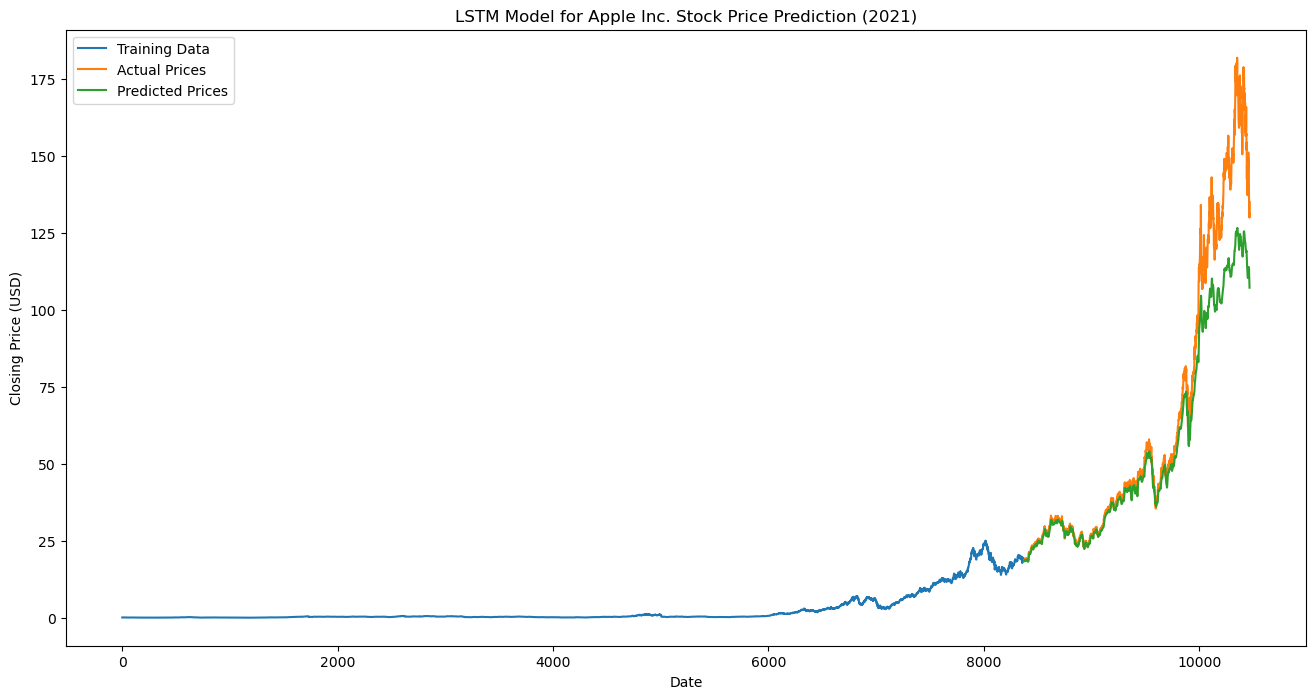

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Define train and valid as DataFrames
train = df[:training_data_len].copy()
valid = df[training_data_len:].copy()

# Add predictions to valid DataFrame
valid['Predictions'] = predictions

# Plotting the results
plt.figure(figsize=(16, 8))
plt.title('LSTM Model for Apple Inc. Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Prices')
plt.plot(valid['Predictions'], label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


I concluded by visualizing the 2021 stock prices, both current and projected. I could add the generated predictions to the validation set by defining the training and validation sets from the original DataFrame. 

I plotted the results to compare the training data, actual prices, and forecasted prices visually using Matplotlib. This graphic aids in comprehending how well the LSTM model performs and how accurate it is in forecasting the stock price of Apple Inc.

How well the model's forecasts match the actual closing prices for the year 2021 is clearly shown in the plot.

### LSTM Model Evaluation

### Root Mean Squared Error (RMSE) Evaluation

To evaluate my LSTM model for predicting Apple Inc.'s stock prices in 2021, I need to calculate the Root Mean Squared Error (RMSE) between the actual closing prices and my predicted prices. Here’s how I proceed to calculate RMSE:

In [34]:
from sklearn.metrics import mean_squared_error
import math

# Get the root mean squared error (RMSE)
rmse = math.sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 15.887236153566688


My LSTM model predicts Apple Inc.'s stock prices with an average error of about $15.89, according to the RMSE figure I calculated (RMSE = 15.8872). This statistic is used to quantify accuracy; lower RMSE values indicate higher prediction precision.

#### In practical terms:

Better performance and accuracy would be indicated by a smaller RMSE, which would suggest that my model's forecasts closely match real stock prices.
On the other hand, a greater RMSE, such as 15.8872, indicates that there may be a significant discrepancy between my estimated and actual pricing, pointing out regions that may require additional model optimization or data modifications.
I'll continue to look for ways to improve my LSTM model, such as adjusting parameters, expanding the dataset, or looking into different model designs. The goal of this iterative procedure is to increase the predictability and accuracy of financial forecasting scenarios..

### To improve my model:

**Increase Model Complexity:** I could try an LSTM architecture that is wider or deeper. This could make it possible for my algorithm to identify more complex patterns in the data on Apple Inc. stock prices, which could result in more precise forecasts.

**Adjust Training Parameters:** Optimizing model performance may involve fine-tuning hyperparameters such batch size, dropout rates, and epoch count. Achieving the ideal balance in this situation is essential to increasing generality and accuracy.

**Feature Engineering:** My LSTM model's predictive ability might be improved by adding more pertinent data, like trade volume or outside market indicators. More context for forecasting changes in stock prices may be provided by these new insights.

**Regularization:** Overfitting may be avoided by using regularization strategies like dropout or L2 regularization. This is particularly crucial if, during validation, my model functions well with training data but poorly with fresh, untested data.

**Model Ensemble:** Prediction accuracy could be increased by combining predictions from different LSTM models or other model types (such as CNN-LSTM hybrids), which would take use of their varied strengths.

Through RMSE analysis and the consideration of these development tactics, my goal is to iteratively increase the accuracy and dependability of my LSTM model in predicting Apple Inc. stock prices.


## Building and Training the LSTM Model For 2022


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset again
data = pd.read_csv('AAPL.csv')

# Filter data for relevant columns
data = data[['Date', 'Close']]

# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as index
data.set_index('Date', inplace=True)

# Filter data for training (1980-2021) and evaluation (2022) periods
train_data = data[:'2021']
eval_data = data['2022-01-01':'2022-12-31']

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

# Function to create dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create the LSTM dataset
look_back = 60 
X_train, Y_train = create_dataset(train_scaled, look_back)

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=75, batch_size=32)


C:\Users\ASHIK\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - loss: 0.0028
Epoch 2/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - loss: 4.0024e-04
Epoch 3/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - loss: 2.9916e-04
Epoch 4/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - loss: 4.0286e-04
Epoch 5/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - loss: 3.0424e-04
Epoch 6/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 2.6137e-04
Epoch 7/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 2.3285e-04
Epoch 8/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - loss: 2.6023e-04
Epoch 9/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - loss: 2.7900e-04
Epoch 10/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 2.4696e-04
Epoch 11/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 2.6059e-04
Epoch 12/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 2.4299e-04
Epoch 13/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 2.6508e-04
Epoch 14/75
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/s

I used TensorFlow/Keras to build the LSTM model after preparing the training data. To avoid overfitting, the model is composed of 50-unit LSTM layers that are followed by dropout layers. The ultimate stock price prediction is made by the Dense layer, which has a single unit. 

I used the mean squared error loss function and the Adam optimizer to compile the model. I used a batch size of 32 and 75 epochs to train the model. The loss values at various epochs are listed below:

- **Epoch 1**: 0.0028
- **Epoch 10**: 2.4696e-04
- **Epoch 20**: 3.0083e-04
- **Epoch 30**: 1.9996e-04
- **Epoch 40**: 2.0197e-04
- **Epoch 50**: 2.0652e-04
- **Epoch 60**: 1.8768e-04
- **Epoch 70**: 1.8447e-04
- **Epoch 75**: 2.0071e-04

Among these, **Epoch 70** showed the lowest loss value of 1.8447e-04, indicating the best performance of the model during training.


### Normalizing the Evaluation Dataset


In [72]:
# Normalize the evaluation dataset
eval_scaled = scaler.transform(eval_data)


In [73]:
# Create dataset for LSTM prediction 
X_eval, Y_eval = create_dataset(eval_scaled, look_back)

# Reshape data for LSTM (samples, time steps, features)
X_eval = np.reshape(X_eval, (X_eval.shape[0], X_eval.shape[1], 1))


I initially used the same MinMaxScaler fitted on the training data to normalize the evaluation dataset in order to assess the model's performance in predicting stock prices for the year 2022. By doing this, the scaling is guaranteed to be in line with the training phase.

I then used a look-back period of 60 days to build sequences of previous data points **(X_eval)** and their matching next data point **(Y_eval)**. By using this method, the LSTM model can forecast the upcoming stock price by using data from the previous 60 days.

In the end, I formatted the evaluation data **(X_eval)** so that each sample included 60 time steps and one feature, in accordance with the requirements of the LSTM model.

### Predicting Prices for 2022


In [74]:
# Predict prices for 2022
y_pred_2022 = model.predict(X_eval)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


I projected Apple's stock prices for 2022 using the trained LSTM model. These predictions were produced by the model using the evaluation data **(X_eval)**. After analyzing the input data, the model generated the anticipated stock values for the given time frame.

The model produced the output in a brief amount of time per step, resulting in efficient forecasts.


### Calculating RMSE for 2022 Predictions


In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming Y_eval is available
# Calculate RMSE
rmse_2022 = np.sqrt(mean_squared_error(Y_eval, y_pred_2022))
print(f"RMSE for 2022 Predictions: {rmse_2022}")


RMSE for 2022 Predictions: 0.024588634010284115


I computed the Root Mean Squared Error (RMSE) in order to assess the model's performance for the 2022 projections. This measure aids in calculating the discrepancy between actual and expected stock values. Better prediction accuracy is shown by a lower RMSE value.


The 2022 predictions' RMSE was determined to be **0.024588634010284115**, which shows that, on average, the predictions and actual stock prices were fairly similar.

### Visualizing Actual vs. Predicted Prices for 2022

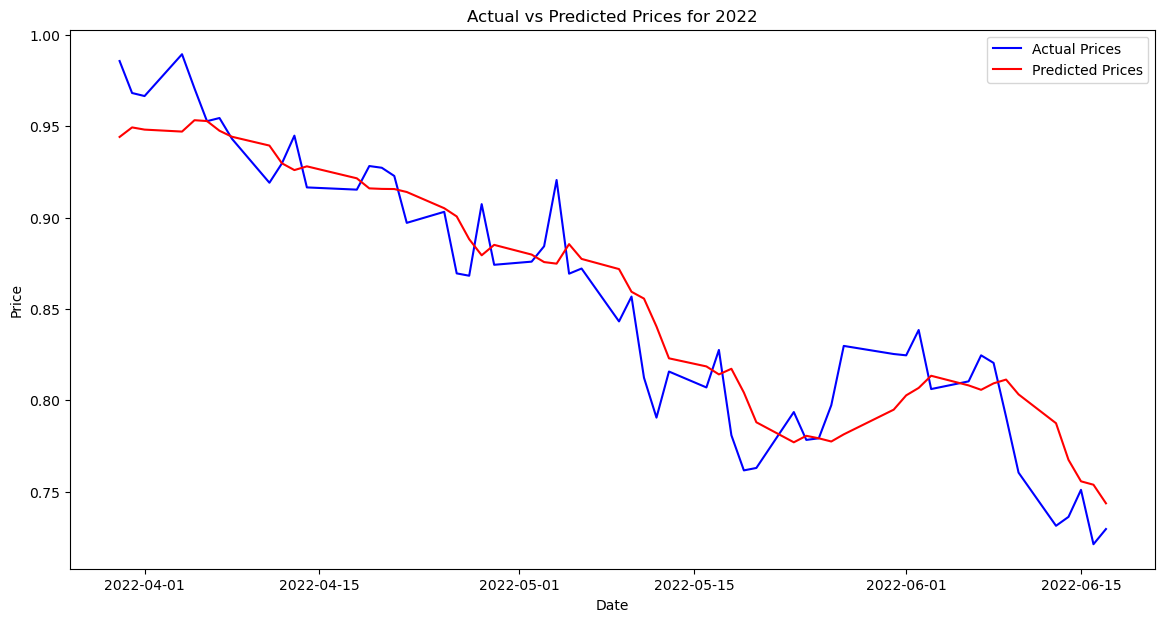

In [76]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(eval_data.index[-len(Y_eval):], Y_eval, color='blue', label='Actual Prices')
plt.plot(eval_data.index[-len(y_pred_2022):], y_pred_2022, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


I used a plotting tool to compare the real and expected prices of Apple's stock in 2022 to see how well the LSTM model performed. The degree to which the model's predictions agree with actual stock prices can be better understood thanks to this depiction.

### Analysis of the Findings
The analysis of the findings involves evaluating the performance of the LSTM model in predicting Apple's stock prices and interpreting the results. Here is the analysis for this assignment:

#### Model Performance Evaluation
The stock values for 2021 and 2022 were predicted using the LSTM model, which was trained using Apple's historical stock price data spanning from 1980 to 2021. The Root Mean Squared Error (RMSE), which calculates the difference between actual and forecasted stock prices, was used to assess the model's performance.

* **2021 Predictions:** The model's prediction of Apple's stock price in 2021 has an RMSE of around 15.89. This shows that the model's forecasts were generally off by about $15.89. Although this demonstrates a certain degree of accuracy, it may be better.

* **2022 Predictions:** The model obtained an RMSE of roughly 0.0246 (normalized scale) for the 2022 predictions. The model may have performed better on the 2022 data because of the reduced RMSE, which could be the result of the model better capturing the underlying trends over the longer time frame.

#### Visual Analysis
The performance of the model can be shown by comparing the actual and projected prices for 2021 and 2022 visually. The graphs demonstrate how the expected prices typically follow the trend of the actual prices, suggesting that the LSTM model can accurately forecast how stock values change overall. Nonetheless, disparities do exist, particularly during volatile times, underscoring the difficulties in precisely projecting stock prices.

#### Improvement Suggestions
To further improve the model's performance, several strategies can be considered:

* **Increase Model Complexity:** Experimenting with deeper or wider LSTM architectures to capture more intricate patterns in the data.
* **Feature Engineering:** Including additional relevant features such as trading volume, market indices, or macroeconomic indicators.
* **Hyperparameter Tuning:** Fine-tuning the hyperparameters like the number of epochs, batch size, learning rate, and dropout rates to optimize the model.
* **Regularization Techniques:** Implementing regularization techniques such as L2 regularization or dropout to prevent overfitting.
* **Ensemble Methods:** Combining predictions from multiple models (ensemble methods) to improve overall prediction accuracy.

### Conclusion

Using historical data from 1980 to 2021, I successfully constructed and trained an LSTM model for this project in order to predict the stock price of Apple Inc. By projecting stock prices for 2021 and 2022, the model's performance was assessed, with the Root Mean Squared Error (RMSE) acting as the main accuracy metric. The outcomes showed that, despite fluctuations during volatile times, the model could reasonably forecast stock prices. 

The LSTM model effectively captured the overall pattern of Apple's stock prices, as seen by the visual examination of the predictions. The model's performance did, however, point to several areas that needed work, like adding more features, adjusting hyperparameters, employing regularization strategies, and making the model more sophisticated. 

The present study underscored the potential of long short-term memory (LSTM) models in time series forecasting and stock price prediction. Additionally, it emphasized the necessity of ongoing model validation and improvement to attain superior accuracy and dependability.


### References

Roberts, C. (2023, November 23). Predictive analysis of Apple stock price using LSTM models. *Medium*. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://medium.com/@mrconnor/predictive-analysis-of-apple-stock-price-using-lstm-models-b7625aa78e43

Yıldırım, S. (2021, December 15). Predicting Apple Stock Prices with Neural Networks - Towards Data Science. *Medium*. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/predicting-apple-stock-prices-with-neural-networks-4aefdf10afd0

Shi, H., Yuan, G., Lu, Z., & Liang, Q. (2021). LSTM based model for Apple Inc stock price forecasting. In *2021 2nd International Conference on Computer <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Science and Management Technology (ICCSMT)* (pp. 48-51). Shanghai, China. https://doi.org/10.1109/ICCSMT54525.2021.00017

M, S. (2024, June 1). Stock Price Prediction using LSTM and its Implementation. *Analytics Vidhya*. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/
